**Decision Tree Post Cost Complexity Pruning approach**

Overfitting is a problem associated with all the Machine learning models if not handled properly. Same is the case with decision tree.If a DT model is left uncontrolled, it will define rule for all the outputs in the training set and will do exceptionally good with training data but not the same with test data.

some of the ways to handle the situation are:
- limiting the depth of the tree
- limiting the number of lead nodes in the tree

Here we are discussing on the approach of Post Cost Complexity Pruning method, in which we will find the weak node points and on basis of that we will supply the CCP_ALPHA values to the classifier to prune the decision tree accordingly.

# Installing the latest version of SKlearn

In [1]:
!pip install -U scikit-learn

     |████████████████████████████████| 22.3MB 130kB/s 
  Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


# Importing the libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

%matplotlib inline

In [3]:
sklearn.__version__

'0.24.2'

# Dataset preparation

In [4]:
from sklearn.datasets import load_breast_cancer

In [5]:
bcdata = load_breast_cancer()

In [6]:
bcdf = pd.DataFrame(bcdata.data, columns=bcdata.feature_names)
bcdf

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


# Scaling of dataset

In [7]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X = ss.fit_transform(bcdf)

In [8]:
Y = bcdata.target

# Splitting of test and train data points

In [9]:
# Splitting of dataset
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X,Y,test_size=0.3, random_state = 101)

In [10]:
xtrain.shape,xtest.shape,ytrain.shape,ytest.shape

((398, 30), (171, 30), (398,), (171,))

# Fitting the model for Alpha points

In [11]:
from sklearn.tree import DecisionTreeClassifier

In [12]:
clf = DecisionTreeClassifier()
clf.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [13]:
clf.score(xtest,ytest)

0.9064327485380117

# Generating the uncontrolled Decision tree

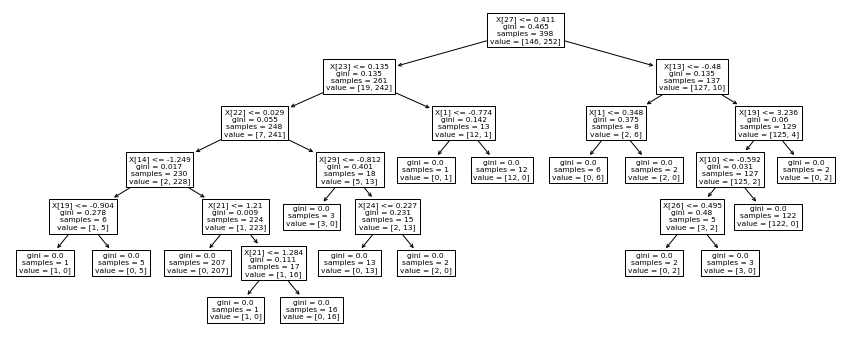

In [14]:
plt.figure(figsize=(15,6))
sklearn.tree.plot_tree(clf)
plt.show()

# Finding the CCP Alpha points and impurities 

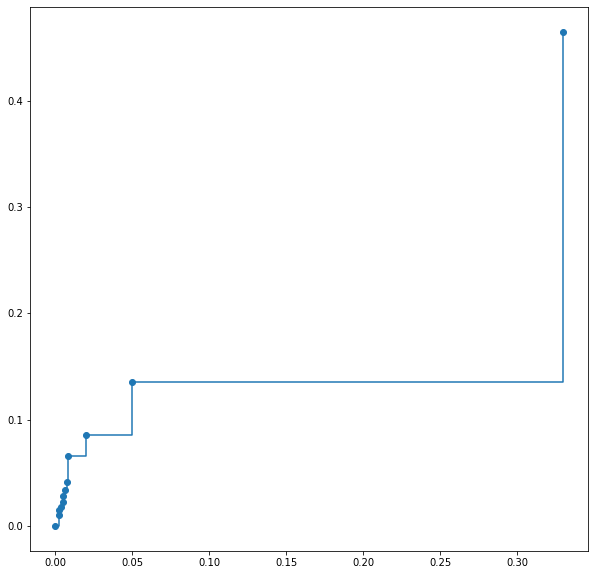

In [15]:
clf = DecisionTreeClassifier()
path = clf.cost_complexity_pruning_path(xtrain,ytrain)
ccalphas,impurities = path.ccp_alphas,path.impurities
plt.figure(figsize=(10,10))
plt.plot(ccalphas,impurities, marker='o', drawstyle="steps-post")
plt.show()

In [16]:
path

{'ccp_alphas': array([0.        , 0.00249071, 0.00249246, 0.00335008, 0.00463858,
        0.0049058 , 0.00623642, 0.00753769, 0.00807338, 0.01956836,
        0.04970534, 0.32942352]),
 'impurities': array([0.        , 0.00996286, 0.01494778, 0.01829787, 0.02293644,
        0.02784224, 0.03407867, 0.04161635, 0.06583651, 0.08540487,
        0.13511021, 0.46453372])}

# Fitting the models with different ccp alpha values

In [17]:
clfs = []
for ccp_alpha in path.ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(xtrain, ytrain)
    clfs.append(clf)

# Evaluating the test and train score for the trained models

In [18]:
train_score = [clf.score(xtrain,ytrain) for clf in clfs]
test_score = [clf.score(xtest,ytest) for clf in clfs]

In [25]:
scoredf = pd.DataFrame()
scoredf['train score'] = train_score
scoredf['test score'] = test_score
scoredf['ccp_alphas'] = path.ccp_alphas
scoredf['impurities'] = path.impurities

In [26]:
scoredf

,train score,test score,ccp_alphas,impurities
0,1.000000,0.912281,0.000000,0.000000
1,0.994975,0.923977,0.002491,0.009963
2,0.992462,0.923977,0.002492,0.014948
3,0.989950,0.923977,0.003350,0.018298
4,0.987437,0.923977,0.004639,0.022936
5,0.984925,0.929825,0.004906,0.027842
6,0.982412,0.929825,0.006236,0.034079
7,0.977387,0.923977,0.007538,0.041616
8,0.964824,0.929825,0.008073,0.065837
9,0.954774,0.935673,0.019568,0.085405


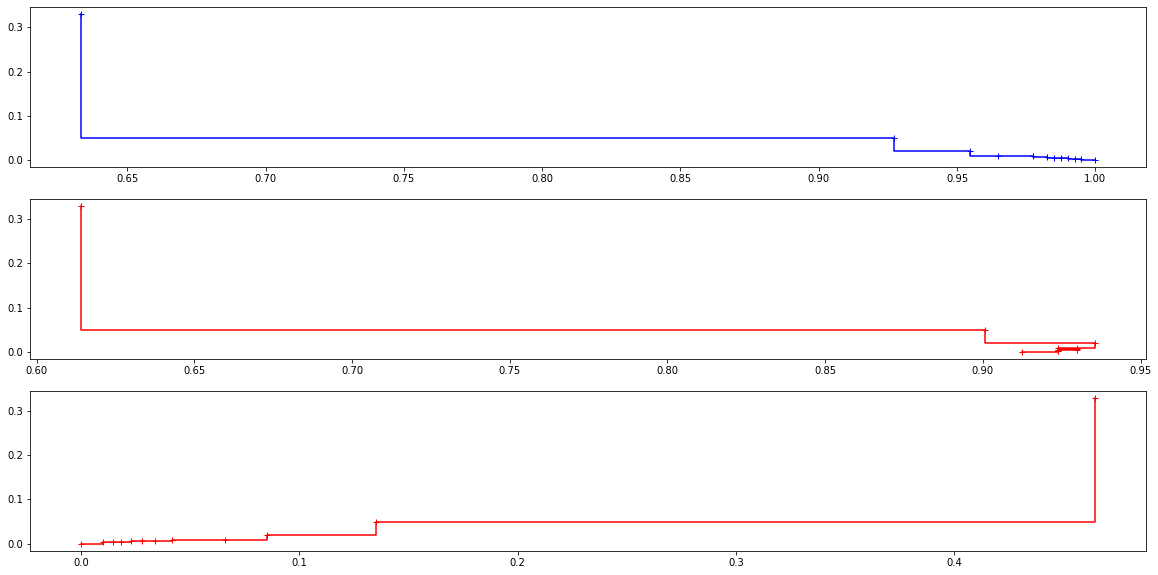

In [30]:
fig,axs = plt.subplots(3,1,figsize=(20,10))
axs[0].plot(train_score, path.ccp_alphas,marker = '+', color = 'blue',drawstyle="steps-post")
axs[1].plot(test_score, path.ccp_alphas,marker = '+', color = 'red',drawstyle="steps-post")
axs[2].plot(scoredf.impurities, path.ccp_alphas,marker = '+', color = 'red',drawstyle="steps-post")
plt.show()

# Generating the tree paths for different classifiers 

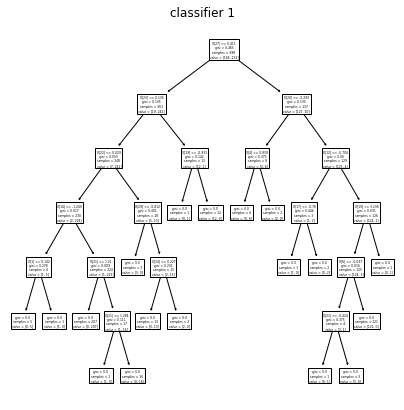

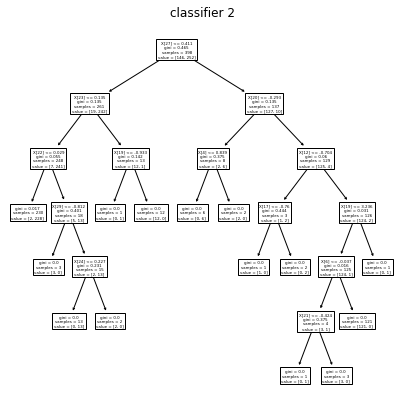

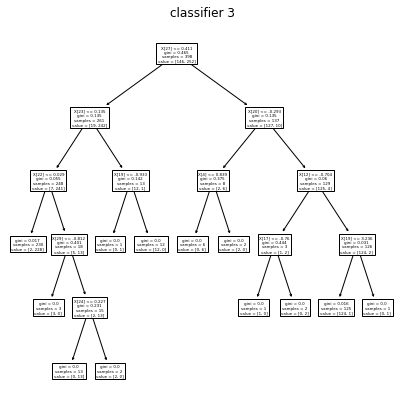

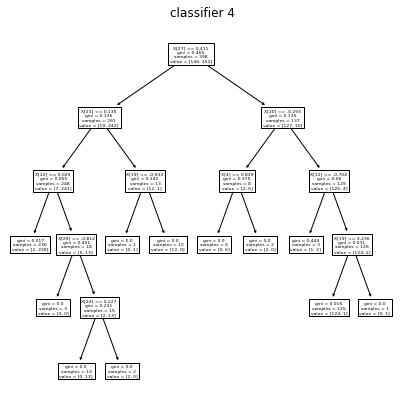

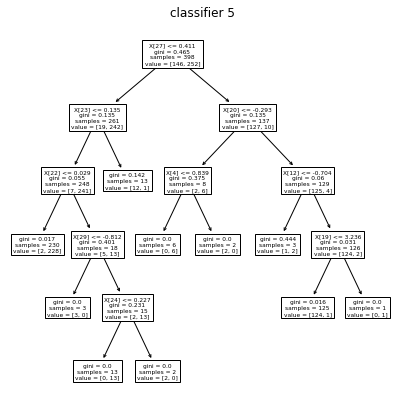

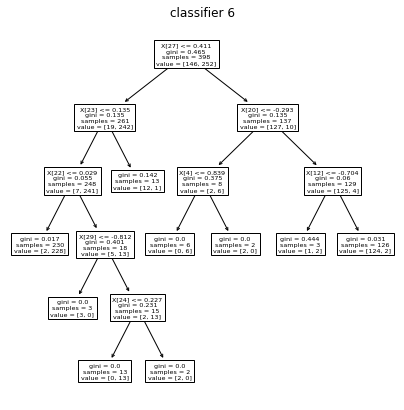

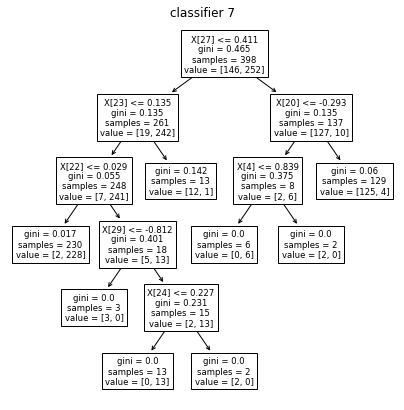

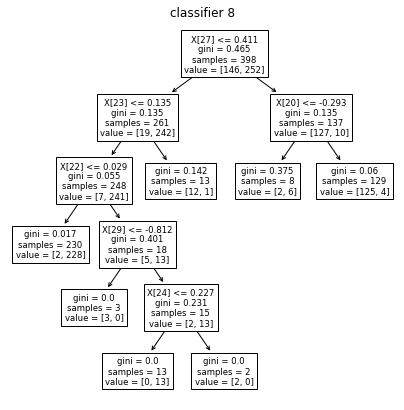

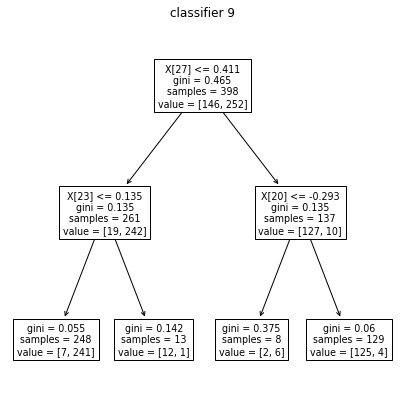

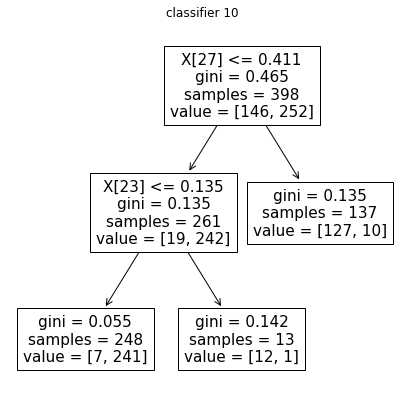

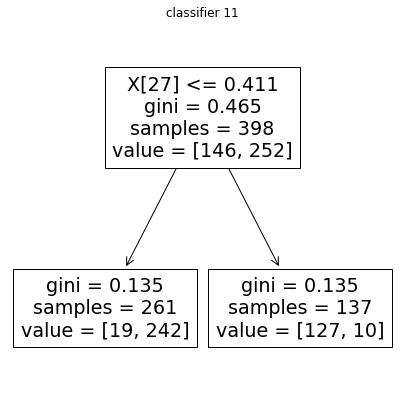

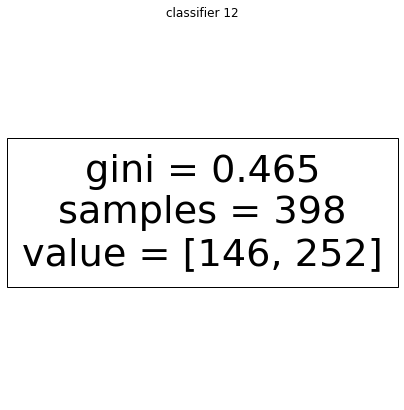

In [28]:
k=1
for clf in clfs:
  plt.figure(figsize=(7,7))
  sklearn.tree.plot_tree(clf)
  plt.title("classifier {}".format(k))
  plt.show()
  k+=1